# Übersprechen der Kamera

Die Daten stammen von der Gatan US4000, die am Zeiss Libra 200FE in Münster verbaut ist. Die Kamera besteht aus 4 Sektoren mit jeweils 2048x2048 Pixel, so dass sich insgesamt eine Auflösung von 4096x4096 Pixel ergibt.

In [1]:
import pandas as pd
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import os
import_dir = 'data/übersprechen/'
img_path = 'data/übersprechen/NewRef_B1_1s_30000count_1Sektor_norm.tif'
img = mpimg.imread(img_path)

name_map = {
    'Sektor_UL': 'unten links',
    'Sektor_OL': 'oben links',
    'Sektor_OR': 'oben rechts',
    'Sektor_UR': 'unten rechts'
}

profiles = {}
for file in os.listdir(import_dir):
    if file.endswith('.xls'):
        df = pd.read_csv(os.path.join(import_dir, file), sep='\t')
        name = file.split('.')[0]
        assert name in name_map
        name = name_map[name]
        profiles[name] = df

Das Beispiel verwendet die 100µm-Filtereintrittsvlende, um das Übersprechen zu demonstrieren. Damit fällt das Übersprechen relativ schwach aus. Ist die hohe Intensität auf eine kleine Fläche konzentriert (z.B. bei EELS), dann kann ein stärkeres Übersprechen auftretten.

Die Profile zeigen das Signal, welches man beim Übergang zu den hellen Flächen erhält. Senkrecht zur gezeigten Richtung wurde über 64 Pixel gemittelt.

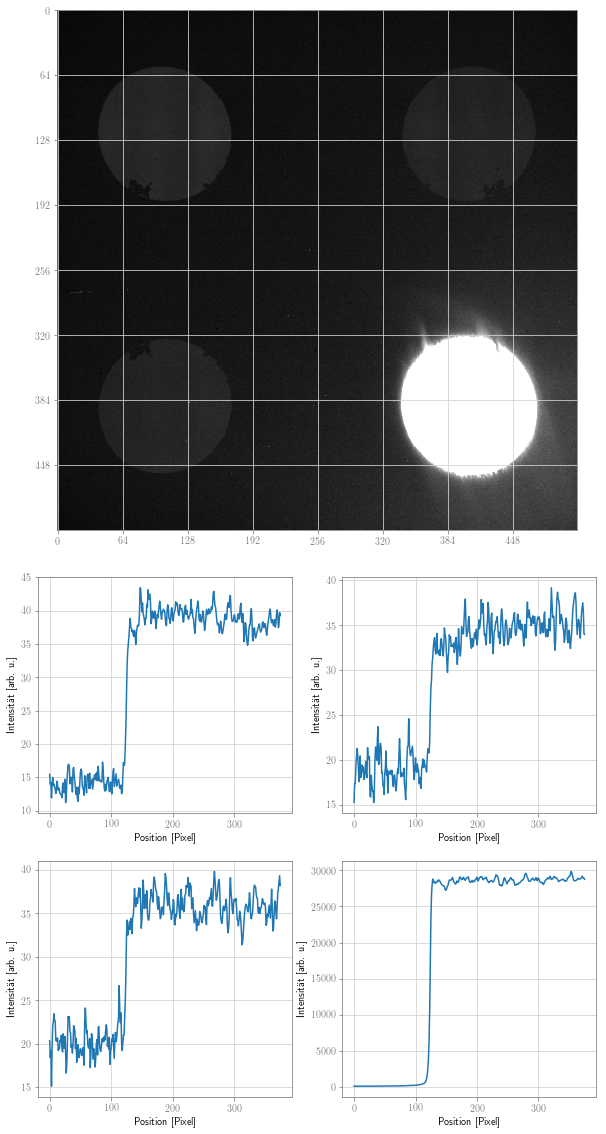

In [2]:
from matplotlib import gridspec
from matplotlib.colors import LogNorm 

fig = plt.figure(figsize=(10,20))
gs = gridspec.GridSpec(4, 2)
ax1 = fig.add_subplot(gs[:-2, :])
ax1.set_xticks(range(0,513,64))
ax1.set_yticks(range(0,513,64))
ax1.imshow(img)
index = 4
for label in sorted(profiles.keys()):
    #print(index // 2, index % 2)
    ax = fig.add_subplot(gs[index // 2, index % 2])
    df = profiles[label]
    ax.set_xlabel('Position [Pixel]')
    ax.set_ylabel('Intensität [arb. u.]')
    ax.plot(range(len(df.Y)), df.Y, label=label)
    index += 1

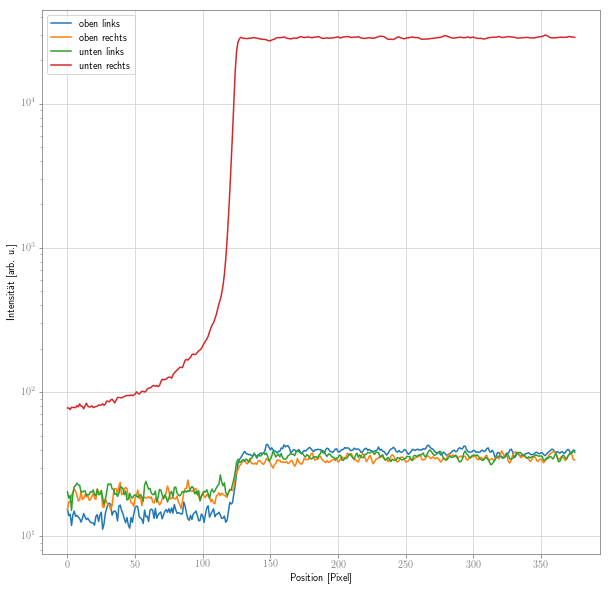

In [3]:
fig = plt.figure(figsize=(10,10))
for label in sorted(profiles.keys()):
    df = profiles[label]
    plt.xlabel('Position [Pixel]')
    plt.ylabel('Intensität [arb. u.]')
    plt.plot(range(len(df.Y)), df.Y, label=label)
plt.yscale('log')
plt.legend(loc='best')
plt.show()